In [45]:
climate <- matrix(c(
  9.2, 1.1, 0.8, 15,
  6.5, 0.9, 1.2, 30,
  2.3, 0.7, 2.5, 60,
  3.8, 1.0, 1.5, 45,
  7.1, 1.2, 0.9, 25,
  4.2, 1.0, 2.1, 50
), nrow = 6, byrow = TRUE)

colnames(climate) <- c("CO2", "Temp", "Deforestation", "Renewables")
rownames(climate) <- c("A", "B", "C", "D", "E", "F")

print(climate)
#This matrix simulates six countries' environmental data.

  CO2 Temp Deforestation Renewables
A 9.2  1.1           0.8         15
B 6.5  0.9           1.2         30
C 2.3  0.7           2.5         60
D 3.8  1.0           1.5         45
E 7.1  1.2           0.9         25
F 4.2  1.0           2.1         50


In [46]:
#Scale the matrix so all variables have mean 0 and standard deviation 1.

scaled_climate <- scale(climate)
print(scaled_climate)
#🧠 Prompt: Why is scaling important before computing correlation?

         CO2        Temp Deforestation Renewables
A  1.4544133  0.67734887    -1.0320937 -1.3269776
B  0.3882823 -0.48382062    -0.4423259 -0.4423259
C -1.2701437 -1.64499012     1.4744196  1.3269776
D -0.6778487  0.09676412     0.0000000  0.4423259
E  0.6252003  1.25793362    -0.8846517 -0.7372098
F -0.5199034  0.09676412     0.8846517  0.7372098
attr(,"scaled:center")
          CO2          Temp Deforestation    Renewables 
    5.5166667     0.9833333     1.5000000    37.5000000 
attr(,"scaled:scale")
          CO2          Temp Deforestation    Renewables 
    2.5325218     0.1722401     0.6782330    16.9558250 


In [47]:
cor_matrix <- cor(scaled_climate)
print(round(cor_matrix, 2))
#You're now looking at the relationship between all environmental indicators across countries.

                CO2  Temp Deforestation Renewables
CO2            1.00  0.71         -0.91      -0.99
Temp           0.71  1.00         -0.79      -0.74
Deforestation -0.91 -0.79          1.00       0.97
Renewables    -0.99 -0.74          0.97       1.00


In [48]:
install.packages("reshape2")  # run only once
library(reshape2)

melted <- melt(cor_matrix)
head(melted)
#This reformats your correlation matrix into long format for ggplot2.

Warning message:
"package 'reshape2' is in use and will not be installed"


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,CO2,CO2,1.0000000
2,Temp,CO2,0.7114442
3,Deforestation,CO2,-0.9117162
4,Renewables,CO2,-0.9862370
5,CO2,Temp,0.7114442
6,Temp,Temp,1.0000000


In [49]:
#This is a polished, high-quality heatmap with visual appeal:

install.packages("ggplot2")  # run only once
library(ggplot2)

Warning message:
"package 'ggplot2' is in use and will not be installed"


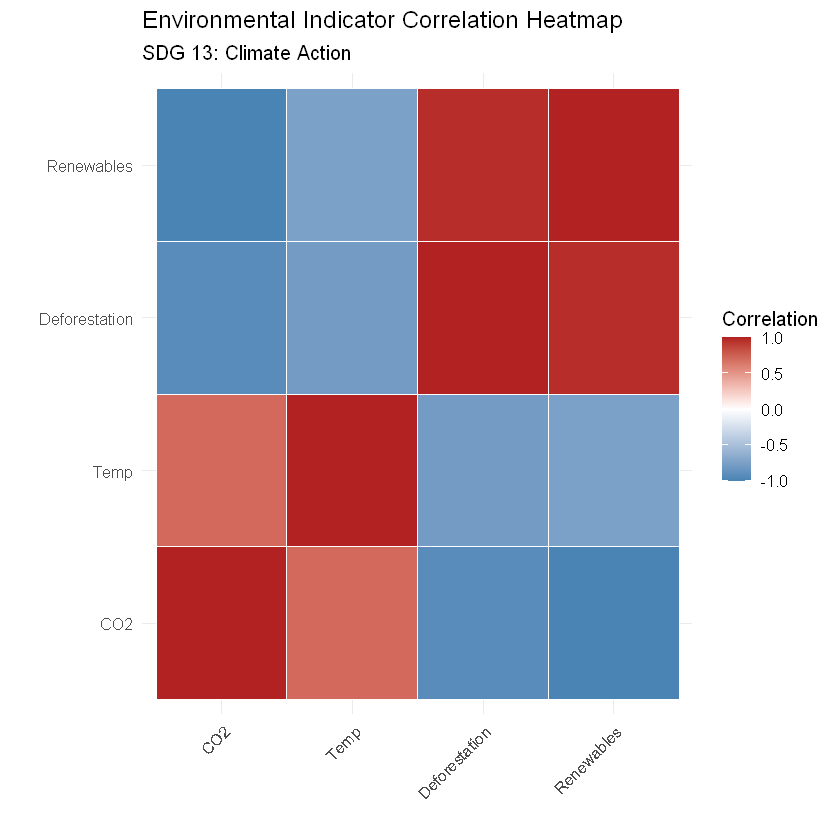

In [50]:
library(ggplot2)

ggplot(melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white", linewidth = 0.5) +
  scale_fill_gradient2(
    low = "steelblue",
    high = "firebrick",
    mid = "white",
    midpoint = 0,
    limit = c(-1, 1),
    name = "Correlation"
  ) +
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(
    title = "Environmental Indicator Correlation Heatmap",
    subtitle = "SDG 13: Climate Action",
    x = "",
    y = ""
  )

In [51]:
#Try this: Increase the renewable energy share in Country C (row 3):

climate[3, 4] <- 90  # new renewables value for Country C
scaled_climate <- scale(climate)
cor_matrix <- cor(scaled_climate)
melted <- melt(cor_matrix)

# Re-plot the heatmap (same code as above)
#Question: How did this change the correlation between renewables and the other variables?

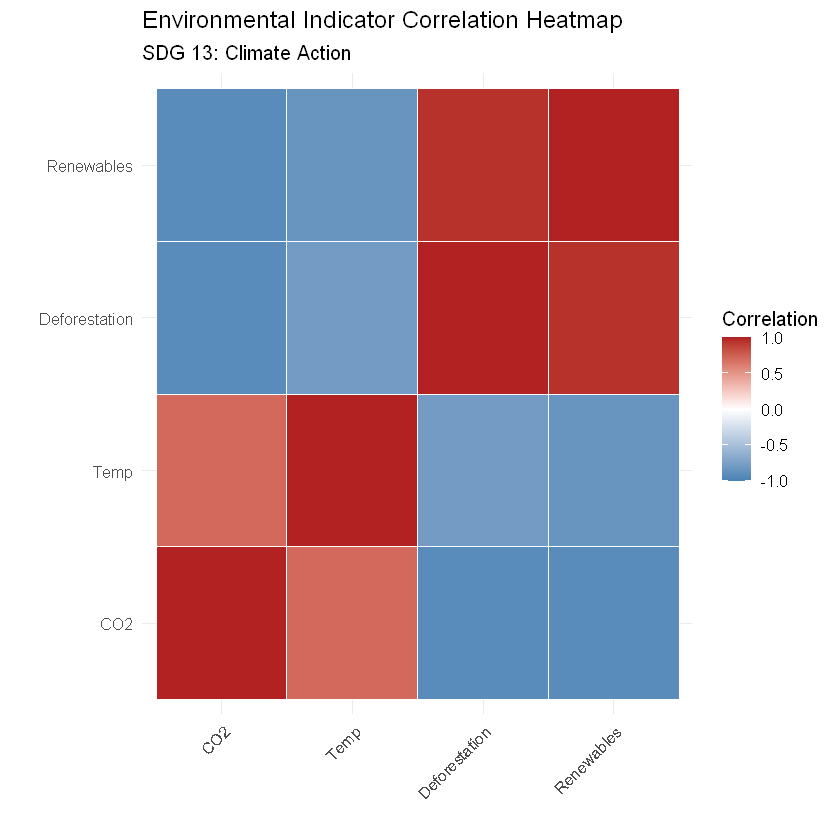

In [53]:
library(ggplot2)

ggplot(melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white", linewidth = 0.5) +
  scale_fill_gradient2(
    low = "steelblue",
    high = "firebrick",
    mid = "white",
    midpoint = 0,
    limit = c(-1, 1),
    name = "Correlation"
  ) +
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(
    title = "Environmental Indicator Correlation Heatmap",
    subtitle = "SDG 13: Climate Action",
    x = "",
    y = ""
  )

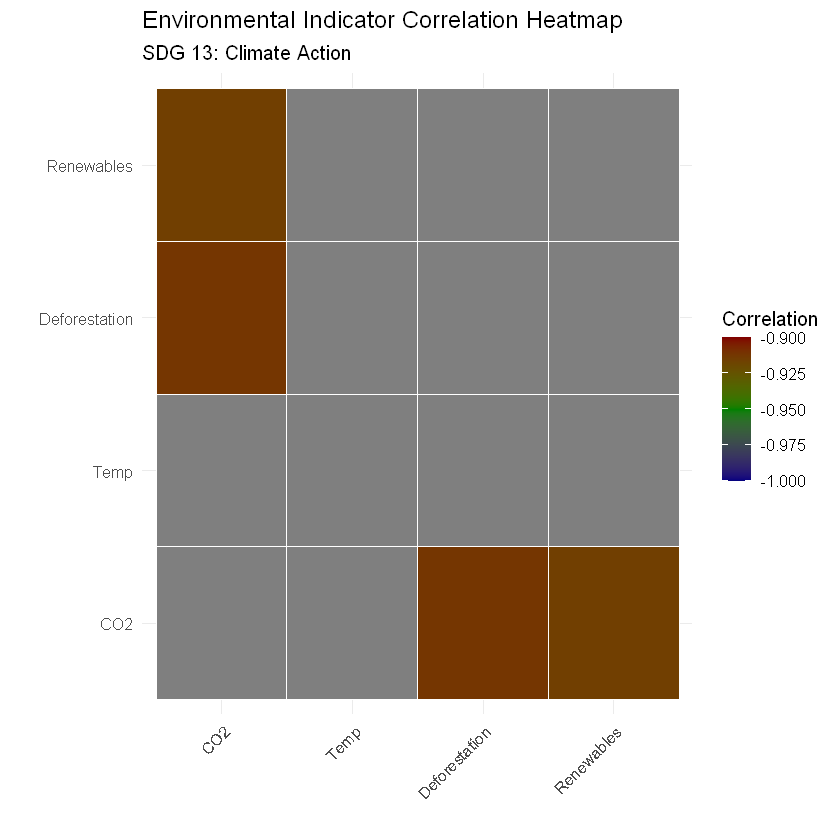

In [54]:
library(ggplot2)
ggplot(melted, aes(x = Var1, y = Var2, fill = value)) +
geom_tile(color = "white", linewidth = 0.5) +
scale_fill_gradient2(
    low = "#000080",
    high = "#800000",
    mid = "#008000",
    midpoint = -0.95,
    limit = c(-1, -0.9),
    name = "Correlation"
) +
theme_minimal(base_size = 12) +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
labs(
    title = "Environmental Indicator Correlation Heatmap",
    subtitle = "SDG 13: Climate Action",
    x = "",
    y = ""
)